In [8]:
import json

file_path = 'output/control_64_30/log.txt'

data = {
    'train_lr': [],
    'train_loss': [],
    'test_loss': [],
    'test_acc1': [],
    'test_acc5': [],
    'epoch': [],
    'n_parameters': [],
    'memory_usage_mb': []
}

with open(file_path, 'r') as file:
    for line in file:
        if "Memory Usage" in line:
            memory_usage_mb = float(line.split()[-2])
            data['memory_usage_mb'].append(memory_usage_mb)
        else:
            try:
                line_data = json.loads(line.strip())
                
                data['train_lr'].append(line_data.get('train_lr'))
                data['train_loss'].append(line_data.get('train_loss'))
                data['test_loss'].append(line_data.get('test_loss'))
                data['test_acc1'].append(line_data.get('test_acc1'))
                data['test_acc5'].append(line_data.get('test_acc5'))
                data['epoch'].append(line_data.get('epoch'))
                data['n_parameters'].append(line_data.get('n_parameters'))
            except json.JSONDecodeError:
                pass

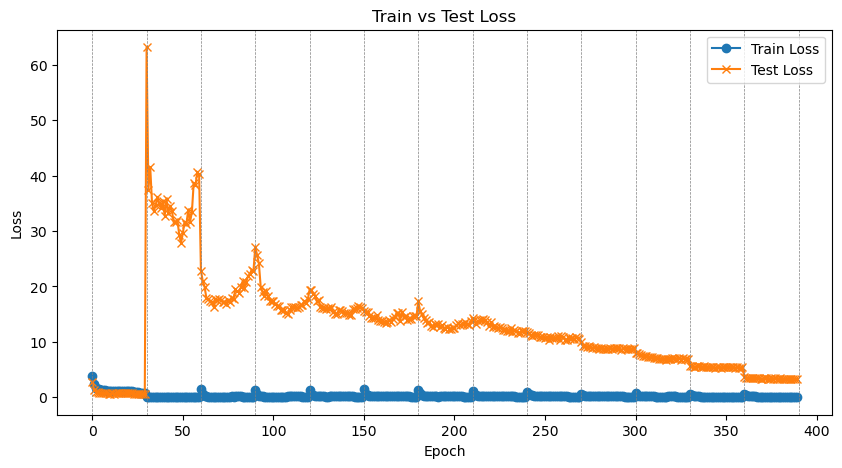

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))

plt.plot(data['train_loss'], label='Train Loss', marker='o')
plt.plot(data['test_loss'], label='Test Loss', marker='x')

max_epoch = len(data['train_loss'])
for epoch in range(0, max_epoch + 1, 30):
    plt.axvline(x=epoch, color='gray', linestyle='--', linewidth=0.5)

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Train vs Test Loss')
plt.legend()
plt.show()



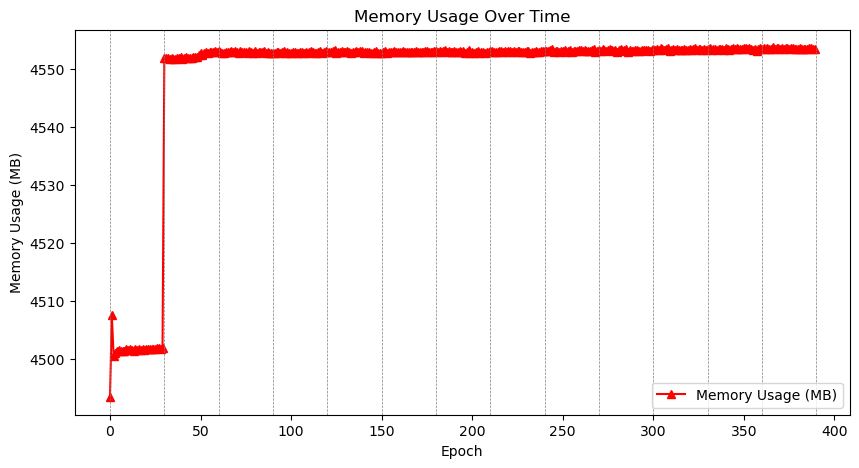

In [16]:

plt.figure(figsize=(10, 5))

plt.plot(data['memory_usage_mb'], label='Memory Usage (MB)', marker='^', color='red')

max_epoch = len(data['memory_usage_mb'])
for epoch in range(0, max_epoch + 1, 30):
    plt.axvline(x=epoch, color='gray', linestyle='--', linewidth=0.5)

plt.xlabel('Epoch')
plt.ylabel('Memory Usage (MB)')
plt.title('Memory Usage Over Time')
plt.legend()
plt.show()

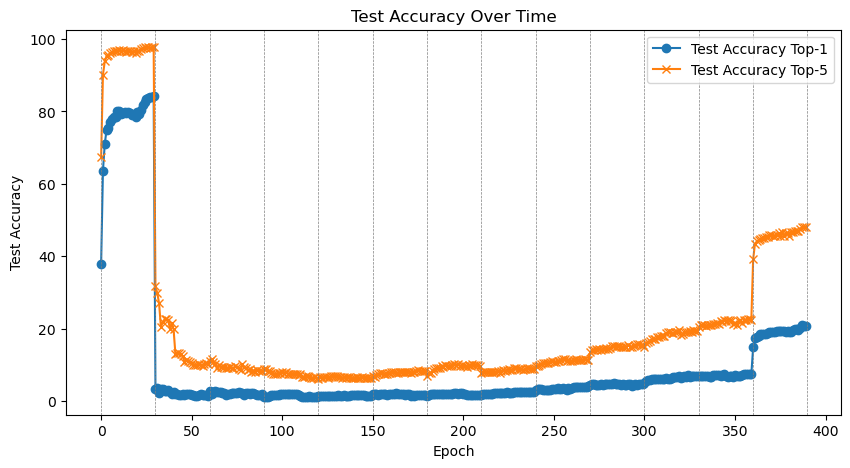

In [15]:
plt.figure(figsize=(10, 5))

plt.plot(data['test_acc1'], label='Test Accuracy Top-1', marker='o')
plt.plot(data['test_acc5'], label='Test Accuracy Top-5', marker='x')

plt.xlabel('Epoch')
plt.ylabel('Test Accuracy')
plt.title('Test Accuracy Over Time')

max_epoch = len(data['test_acc1'])
for epoch in range(0, max_epoch + 1, 30):
    plt.axvline(x=epoch, color='gray', linestyle='--', linewidth=0.5)

plt.legend()
plt.show()
plt.show()